In [27]:
%display latex

# Método del gradiente conjugado

In [251]:
def MetodoGradienteConjugadoCuadratico(A, b, x0, eps=0.01):
    #Escogemos estimacion x0 de h y calculamos r0 y p0
    n = len(b)
    r = [b - A*x0] + [0]*n
    p = [r[0]] + [0]*n
    a = [0] * (n+1)
    beta = [0] * (n+1)
    x = [x0] + [0]*n
    for i in [0..n]:
        if (p[i].norm() < eps):
            break
        a[i] = (p[i].dot_product(r[i])) / (p[i].dot_product(A*p[i]))
        x[i+1] = x[i] + a[i]*p[i]
        r[i+1] = r[i] - a[i]*A*p[i]
        beta[i] = (r[i+1].dot_product(A*p[i])) / (p[i].dot_product(A*p[i]))
        p[i+1] = r[i+1]-beta[i]*p[i]
    return x[i], x[:i+1]

In [267]:
# x = vector([var('x_1'), var('x_2')])
A = Matrix([[3,2],[2,6]])
b = vector((2,-8))
c = 0
x0 = vector((-2, -2))

In [268]:
MetodoGradienteConjugadoCuadratico(A, b, x0)

((2, -2), [(-2, -2), (2/25, -46/75), (2, -2)])

In [263]:
f = 1/2*(3*x^2+6*y^2+4*x*y) - 2*x + 8*y
f

3/2*x^2 + 2*x*y + 3*y^2 - 2*x + 8*y

In [264]:
def MetodoGradienteConjugado(f, x0, eps=0.01):
    # Este metodo es la generalizacion para aproximar cualquier ecuacion a una cuadratica, 
    # de forma que el metodo funcione correctamente
    A = f.hessian().subs({v: 0 for v in f.variables()})
    # Cuidado porque el signo de b cambia respecto a la formula de la forma cuadratica
    b = -f.gradient().subs({v: 0 for v in f.variables()})
    return MetodoGradienteConjugadoCuadratico(A,b,x0,eps)

In [265]:
MetodoGradienteConjugado(f, x0, eps=0.01)

((2, -2), [(-2, -2), (2/25, -46/75), (2, -2)])

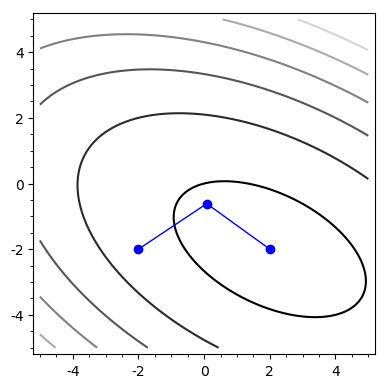

In [273]:
# plot_vector_field(X(x,y), (x,-2,2), (y,-2,2))
# d1 = line(list(zip(*euler(X,t0,[0,0],8.94,100)))[1],color='green',linestyle='--')
c1 = contour_plot(f, (-5,5), (-5,5),fill=false)
c1 + line(MetodoGradienteConjugado(f, x0, eps=0.01)[1],marker='o')

In [ ]:
def MetodoGradienteConjugadoNoLineal(A, b, x0, eps=0.01):
    #Escogemos estimacion x0 de h y calculamos r0 y p0
    n = len(b)
    r = [b - A*x0] + [0]*n
    p = [r[0]] + [0]*n
    a = [0] * (n+1)
    beta = [0] * (n+1)
    x = [x0] + [0]*n
    for i in [0..n]:
        if (p[i].norm() < eps):
            break
        a[i] = (p[i].dot_product(r[i])) / (p[i].dot_product(A*p[i]))
        x[i+1] = x[i] + a[i]*p[i]
        r[i+1] = r[i] - a[i]*A*p[i]
        beta[i] = (r[i+1].dot_product(A*p[i])) / (p[i].dot_product(A*p[i]))
        p[i+1] = r[i+1]-beta[i]*p[i]
    return x[i], x[:i+1]